# CH22. CNN을 이용한 이미지 인식 응용

### Image Data Generator

### Standardization

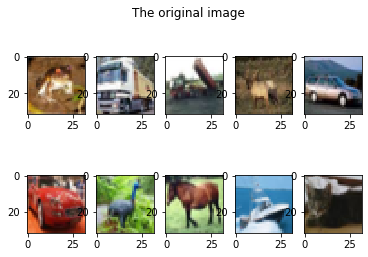

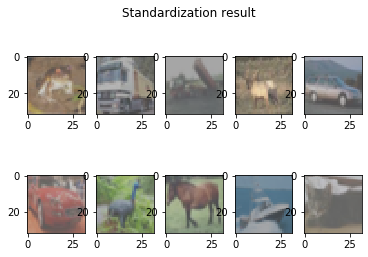

In [4]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

#-- Cifar10 loading
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

#- Generator
datagen = ImageDataGenerator( samplewise_center=True,
                              samplewise_std_normalization=True)

#- Standardization ---
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()
# 생성한 이미지 normalize / quantizing ?
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')
#
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Standardization result', fontsize=12)
plt.show()

### Whitening

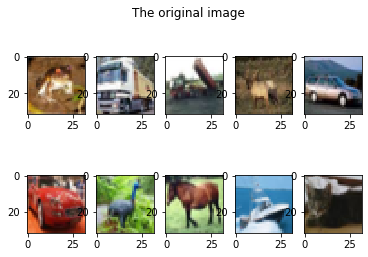

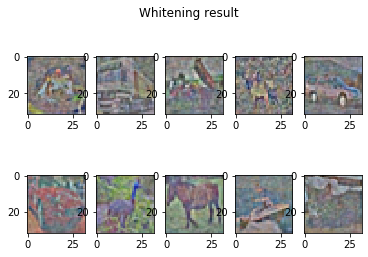

In [6]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

#-- load cifar10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#-- Train:300 ,  Test:100
X_train = X_train[:300]
X_test = X_test[:100]
y_train = y_train[:300]
y_test = y_test[:100]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# Generator - whitening
datagen = datagen = ImageDataGenerator(zca_whitening=True)
#
datagen.fit(X_train)
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

#
X_batch *= 127.0 / max(abs(X_batch.min()), abs(X_batch.max()))
X_batch += 127
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Whitening result', fontsize=12)
plt.show()

### Batch Normalization

Train on 300 samples, validate on 300 samples
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 2.3264 - acc: 0.1233 - val_loss: 2.2612 - val_acc: 0.2300
Epoch 2/3
300/300 [==============================] - 0s 317us/step - loss: 2.1860 - acc: 0.2933 - val_loss: 2.1981 - val_acc: 0.3133
Epoch 3/3
300/300 [==============================] - 0s 289us/step - loss: 2.1005 - acc: 0.4467 - val_loss: 2.1552 - val_acc: 0.3300


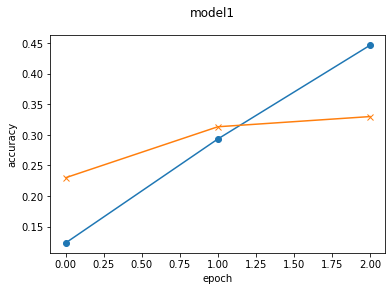

Train on 300 samples, validate on 300 samples
Epoch 1/3
300/300 [==============================] - 1s 5ms/step - loss: 1.6829 - acc: 0.4633 - val_loss: 1.9253 - val_acc: 0.5167
Epoch 2/3
300/300 [==============================] - 0s 418us/step - loss: 0.8208 - acc: 0.7467 - val_loss: 1.4055 - val_acc: 0.6133
Epoch 3/3
300/300 [==============================] - 0s 470us/step - loss: 0.4951 - acc: 0.8800 - val_loss: 1.4088 - val_acc: 0.6167


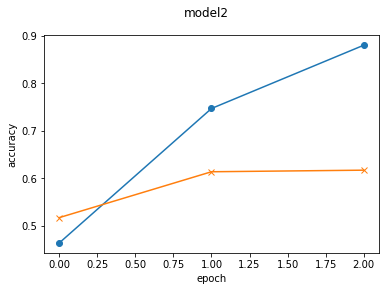

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(a=X_train, newshape=(-1, 28, 28, 1))[:300]
X_test = np.reshape(a = X_test,newshape=(-1, 28, 28, 1))[:300]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:300]

#-- model1 define (active function: sigmoid) ----------------------------
model1 = Sequential()
model1.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('sigmoid'))
model1.add(Dense(128))
model1.add(Activation('sigmoid'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

#-- compile
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#-- training
history = model1.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))
#-- visualization
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle('model1', fontsize=12)
plt.show()


#-- model2 define (active function: ReLU) ---------------------------------
model2 = Sequential()
model2.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
#-- add BN
model2.add(BatchNormalization())
model2.add(Dense(128))
model2.add(Activation('relu'))
#-- add BN
model2.add(BatchNormalization())
model2.add(Dense(10))
model2.add(Activation('softmax'))

#-- compile
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#-- training
history = model2.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

#-- visualization
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle('model2', fontsize=12)
plt.show()

## Transfer learning

In [12]:
from keras.applications.vgg16 import VGG16

input_tensor = Input(shape=(32, 32, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

NameError: name 'Input' is not defined

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

model = Model(inputs=vgg16.input, outputs=top_model)

In [ ]:
# vgg later 19 model
for layer in model.layers[:19]:
    layer.trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

## VGG16

58892288/58889256 [==============================] - 221s 4us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_co

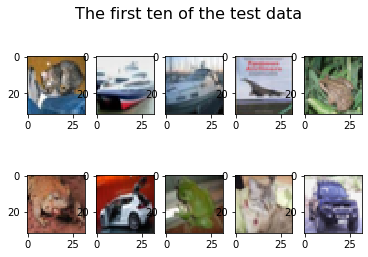

[3 8 8 9 6 6 0 4 6 3]


In [13]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#-- define of input_tensor
input_tensor = Input(shape=(32, 32, 3))

vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

#- vgg16과 top_model을 연결
model = Model(inputs=vgg16.input, outputs=top_model)

# 19층째까지 가중치를 고정
for layer in model.layers[:19]:
    layer.trainable = False

#
model.summary()

#-- compile
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

#-- can be load pre-trained model
# model.load_weights('param_vgg.hdf5')

# batch:32, epoch:3
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)

#-- save model parameter
model.save_weights('param_vgg.hdf5')

#-- accuracy
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

#--
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data",fontsize=16)
plt.show()

#-- predict
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

### 연습 문제

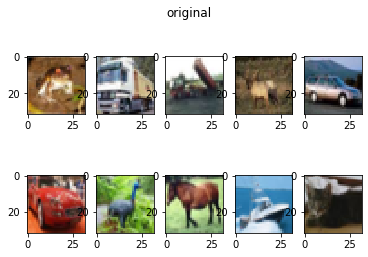

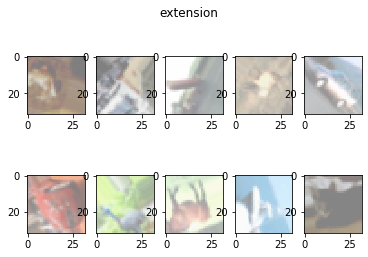

In [14]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

#-- load cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#-- display images
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('original', fontsize=12)
plt.show()


#- augumentation
generator = ImageDataGenerator(
                    rotation_range=90,        # 90°까지 회전
                    width_shift_range=0.3,    # 수평으로 무작위 시프트
                    height_shift_range=0.3,   # 수직으로 무작위 시프트
                    channel_shift_range=70.0, # 색조를 임의로 변경
                    shear_range=0.39,         # 대각선(pi/8까지)
                    horizontal_flip=True,     # 무작위로 수평 반전
                    vertical_flip=True        # 무작위로 수직 반전
                    )

#- (.flow를 사용해 확장할 이미지 데이터를 전달. 비교해서 표시하기 위해, shuffle=False를 지정)
extension = generator.flow(X_train, shuffle=False)
X_batch  = extension.next()

#-
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

#-
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('extension', fontsize=12)
plt.show()

### 종합 문제

In [15]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

#-- data load
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input_tensor를 정의하여 vgg의 ImageNet으로 학습된 모델 작성
input_tensor = Input(shape=(32, 32, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

#- 특징량 추출 부분의 모델
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# vgg16과 top_model을 연결
model = Model(inputs=vgg16.input, outputs=top_model)

# 다음 for 문을 완성시켜, 15층까지의 가중치를 고정
for layer in model.layers[:15]:
    layer.trainable = False

# model summarization
model.summary()


#-- Compile
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

#--
# model.load_weights('param_vgg_15.hdf5')

#- batch size: 32
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)

#- store
model.save_weights('param_vgg_15.hdf5')

#- evaluate
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   